# Lecture 3 - Root finding: Bracketing methods
## Incremental search 
Cell 2 demonstrates the incremental search routine: it defines a sample cubic example_func with roots near 1, 2, and 3, calls incsearch(example_func, 0, 4, ns=40) to sweep the interval [0, 4] in 40 equal steps, and returns any subintervals where the function’s sign flips, meaning a root is bracketed. It then prints the count of such brackets and the list of bracket endpoints (e.g., around 1–2 and 2–3), and evaluates the function at each bracket boundary to show the sign change. This illustrates how incremental search scans a domain to locate intervals that can be passed to a root-refinement method like bisection.


In [1]:
import numpy as np

def incsearch(func,xmin,xmax,ns=50):
    """
    incsearch: incremental search locator
        incsearch(func,xmin,xmax,ns)
        finds brackets of x that contain sign changes in
        a function of x on an interval
    input: 
        func = name of the function
        xmin, xmax = endpoints of the interval
        ns = number of subintervals, default value = 50
    output:  a tuple containing
        nb = number of bracket pairs found
        xb = list of bracket pair values
        or returns "no brackets found"
    """
    x = np.linspace(xmin,xmax,ns) # create array of x values
    f = []  # build array of corresponding function values
    for k in range(ns-1):  
        f.append(func(x[k]))
    nb = 0
    xb = []
    for k in range(ns-2):  # check adjacent pairs of function values
        if func(x[k])*func(x[k+1])<0:  # for sign change
            nb = nb + 1  # increment the bracket counter
            xb.append((x[k],x[k+1]))  # save the bracketing pair
    if nb==0:
        return 'no brackets found'
    else:
        return nb,xb


In [2]:
# create example of incsearch usage (do not use main == "__main__":)
def example_func(x):
    return x**3 - 6*x**2 + 11*x - 6.1  # example function with roots near 1, 2, 3   
num_brackets, brackets = incsearch(example_func, 0, 4, 100)
print(f"Number of brackets found: {num_brackets}")
for root in brackets:
    print(f"Bracket: {np.float32(root)}")



Number of brackets found: 3
Bracket: [1.050505  1.0909091]
Bracket: [1.8585858 1.8989899]
Bracket: [3.030303 3.070707]


## The bisection method
The bisection method takes a function and an interval [xl, xu] where the signs differ, then repeatedly halves the interval to isolate the root: it checks the midpoint xm, keeps the sub-interval where the sign change persists, and continues until the relative error between successive midpoints drops below a tolerance (es, default 1e-7) or a maximum iteration count is reached. Each iteration updates the endpoint corresponding to the same sign as f(xm) and recomputes the midpoint, guaranteeing convergence for continuous functions with an initial sign change. The function returns the root estimate, approximate relative error, and iteration count.

In [3]:
def bisect(func,xl,xu,es=1.e-7,maxit=30):
    """
    Uses the bisection method to estimate a root of func(x).
    The method is iterated until the relative error from
    one iteration to the next falls below the specified
    value or until the maximum number of iterations is
    reached first.
    Input:
        func = name of the function
        xl = lower guess
        xu = upper guess
        es = relative error specification  (default 1.e-7)
        maxit = maximum number of iterations allowed (default 30)
    Output:
        xm = root estimate
        fm = function value at the root estimate
        ea = actual relative error achieved
        i+1 = number of iterations required
        or
        error message if initial guesses do not bracket solution
    """
    if func(xl)*func(xu)>0:
        return 'initial estimates do not bracket solution'
    xmold = xl
    for i in range(maxit):
        xm = (xl+xu)/2
        ea = abs((xm-xmold)/xm)
        if ea < es:  break
        if func(xm)*func(xl)>0:
            xl = xm
        else:
            xu = xm
        xmold = xm
    return xm,func(xm),ea,i+1

import numpy as np

def f(m):
    g = 9.81
    cd = 0.25
    t = 4
    v = 36
    return np.sqrt(m*g/cd)*np.tanh(np.sqrt(g*cd/m)*t)-v

(m,fm,ea,iter) = bisect(f,50,200,maxit=28)
print('mass = {0:10.6f} kg'.format(m))
print('function value = {0:7.3g}'.format(fm))
print('relative error = {0:7.3g}'.format(ea))
print('iterations = {0:5d}'.format(iter))


mass = 142.737636 kg
function value = 5.85e-08
relative error = 6.26e-08
iterations =    24


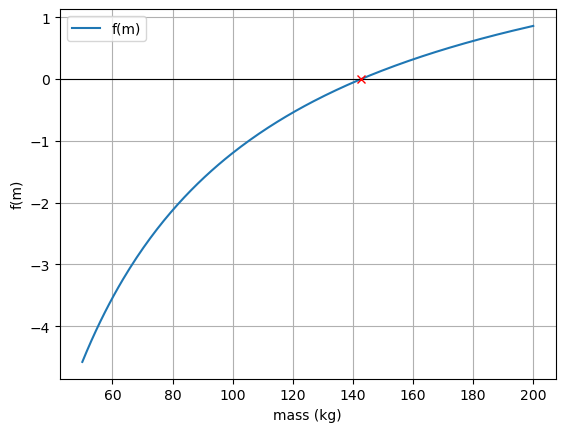

In [4]:
# plot the function f(m) in the interval [50,200] to verify the root location
# also mark the root found by the bisection method
import matplotlib.pyplot as plt
m_plot = np.linspace(50, 200, 200)
plt.plot(m_plot, f(m_plot), label='f(m)')
plt.axhline(0, color='k', linewidth=0.8)
plt.plot([m], [0], 'rx')
plt.xlabel('mass (kg)')
plt.ylabel('f(m)')
plt.legend()
plt.grid()
plt.show()


## False position
The false-position (regula falsi) code in cell below brackets a root with xl and xu of opposite signs, then repeatedly draws the secant through (xl, f(xl)) and (xu, f(xu)) to compute an updated root estimate xr = xu - fu*(xl-xu)/(fl-fu). Each iteration checks the sign of f(xr) to keep the sub-interval that still contains a sign change (updating either xl or xu), and it tracks the relative change between successive xr values (ea) to stop when the tolerance es is met or maxit is reached. The function returns the current xr, f(xr), the achieved error, and iteration count; the example applies it to a drag-force function to solve for mass given velocity, with a small penalty when the initial guesses don’t bracket a root.

In [5]:
# modify the code above for bisect to use the false-positon method instead
def false_position(func,xl,xu,es=1.e-7,maxit=30):
    """
    Uses the false position method to estimate a root of func(x).
    The method is iterated until the relative error from
    one iteration to the next falls below the specified
    value or until the maximum number of iterations is
    reached first.
    Input:
        func = name of the function
        xl = lower guess
        xu = upper guess
        es = relative error specification  (default 1.e-7)
        maxit = maximum number of iterations allowed (default 30)
    Output:
        xm = root estimate
        fm = function value at the root estimate
        ea = actual relative error achieved
        i+1 = number of iterations required
        or
        error message if initial guesses do not bracket solution
    """
    if func(xl)*func(xu)>0:
        return 'initial estimates do not bracket solution'
    xmold = xl
    for i in range(maxit):
        # calculate the false position
        xm = xu - (func(xu)*(xl - xu)) / (func(xl) - func(xu))
        ea = abs((xm - xmold) / xm)
        if ea < es:  break
        if func(xm)*func(xl)>0:
            xl = xm
        else:
            xu = xm
        xmold = xm
    return xm,func(xm),ea,i+1

def f(m):
    g = 9.81
    cd = 0.25
    t = 4
    v = 36
    return np.sqrt(m*g/cd)*np.tanh(np.sqrt(g*cd/m)*t)-v

(m,fm,ea,iter) = false_position(f,50,200,maxit=28)
print('mass = {0:10.6f} kg'.format(m))
print('function value = {0:7.3g}'.format(fm))
print('relative error = {0:7.3g}'.format(ea))
print('iterations = {0:5d}'.format(iter))


mass = 142.737651 kg
function value = 3.67e-07
relative error = 8.89e-08
iterations =    28
